# Setup

## Get jupyter and python running on your machine

## Packages

Make sure to have the following packages installed:

* numpy
* cv2
* matplotlib

In [26]:
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
import numpy as np

## Software

### Install Gimp on your machine and make sure that it is running

### If you are on Windows, you also might want  to install paint.net

# Images

In [27]:
img = mpimg.imread('THI.jpg')

## Use matplotlib to read the following image THI.jpg

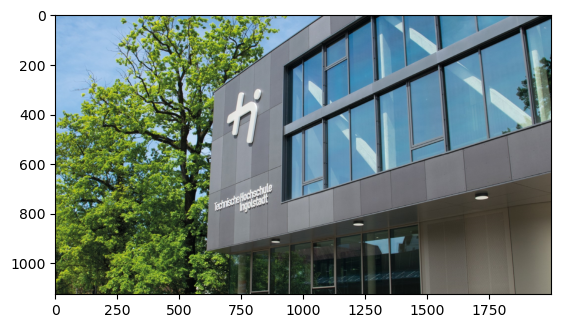

In [28]:
plt.imshow(img)

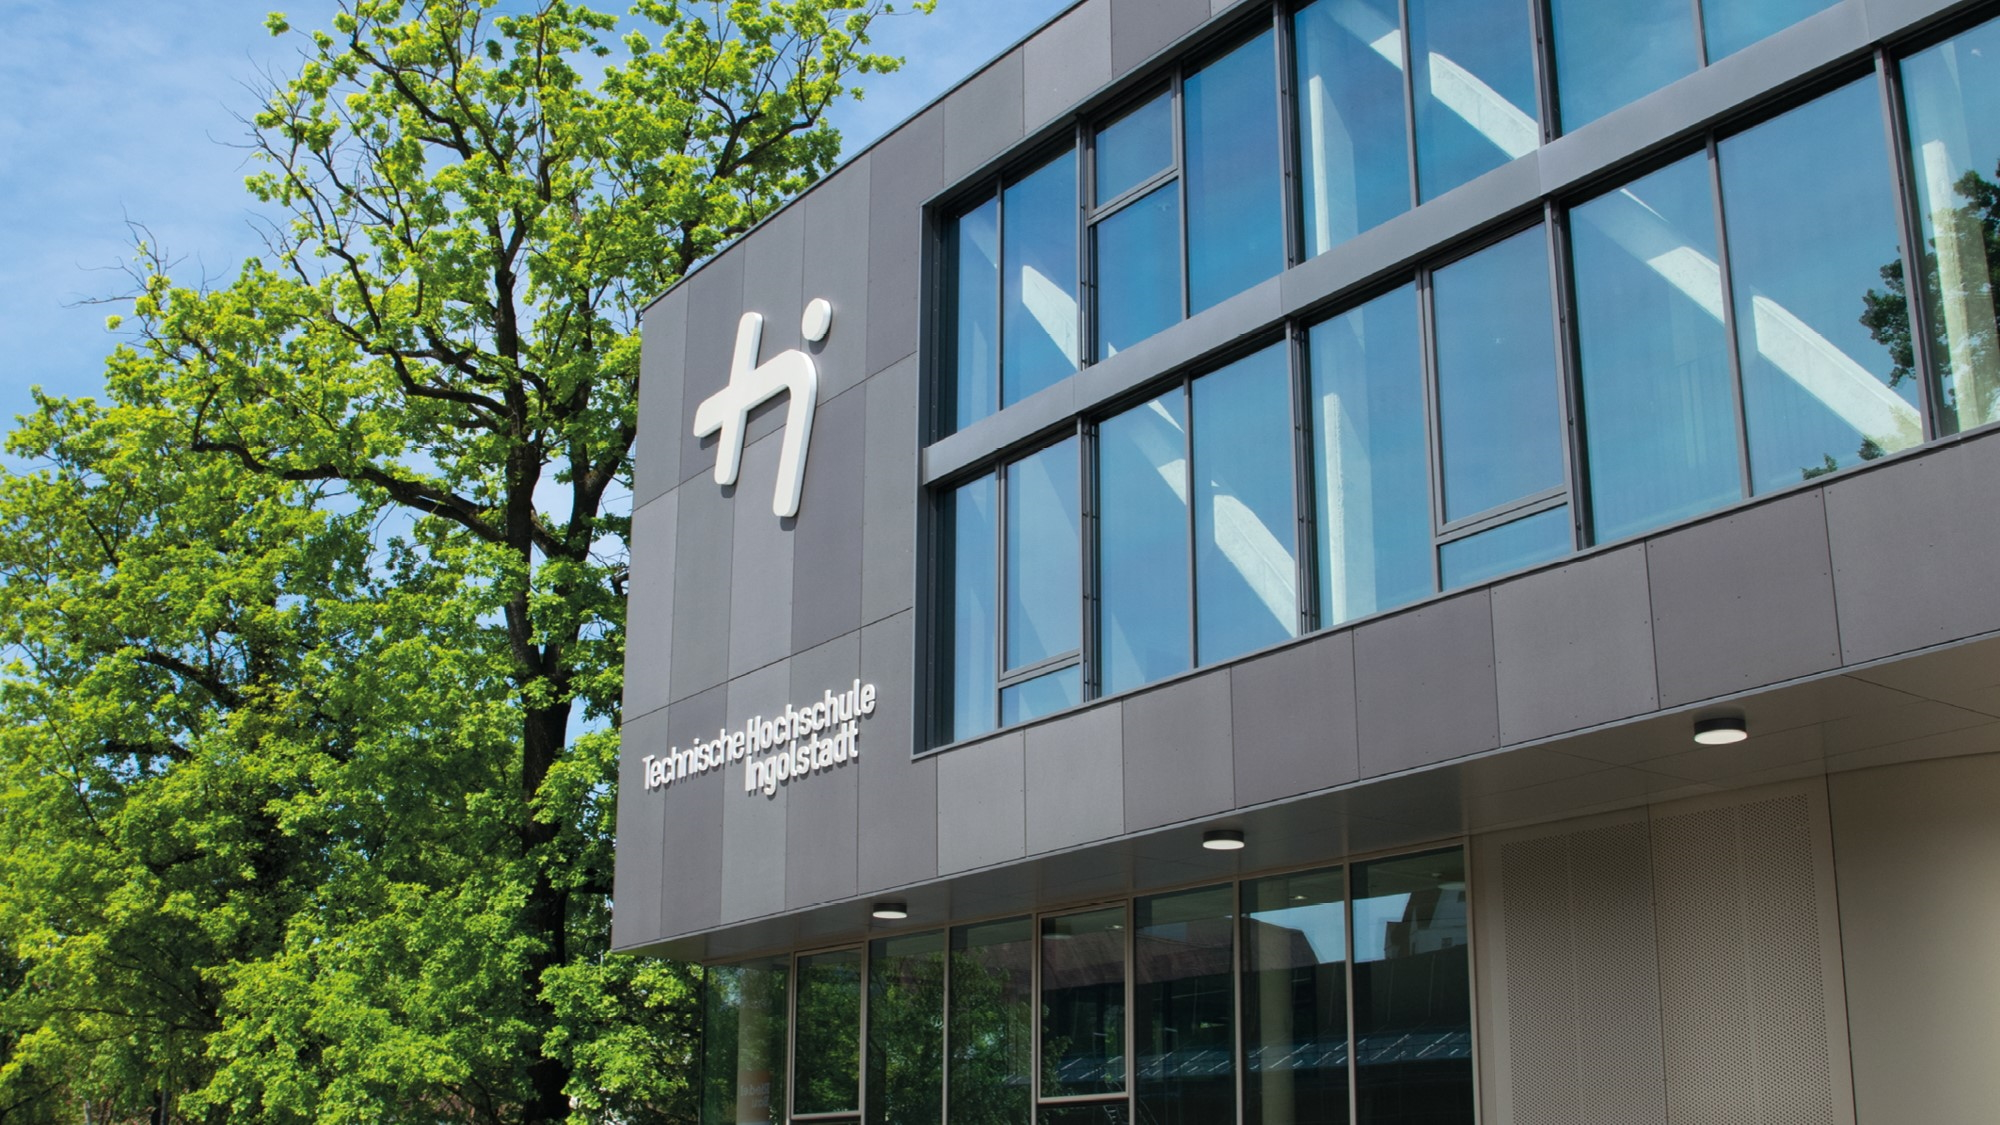

## What data structure does the image have?

In [29]:
print(repr(img))

array([[[140, 181, 225],
        [140, 181, 225],
        [140, 181, 225],
        ...,
        [  4,   8,   9],
        [  4,   8,   9],
        [  4,   8,   9]],

       [[140, 181, 225],
        [140, 181, 225],
        [139, 180, 224],
        ...,
        [  3,   7,   8],
        [  3,   7,   8],
        [  3,   7,   8]],

       [[140, 181, 225],
        [140, 181, 225],
        [139, 180, 224],
        ...,
        [  3,   7,   8],
        [  4,   8,   9],
        [  5,   9,  10]],

       ...,

       [[ 14,  17,  10],
        [ 25,  28,  19],
        [ 34,  41,  23],
        ...,
        [147, 144, 125],
        [147, 144, 125],
        [147, 144, 125]],

       [[ 17,  20,  13],
        [ 27,  30,  21],
        [ 35,  42,  24],
        ...,
        [147, 144, 125],
        [148, 145, 126],
        [148, 145, 126]],

       [[ 16,  19,  12],
        [ 28,  31,  22],
        [ 38,  45,  27],
        ...,
        [147, 144, 125],
        [148, 145, 126],
        [148, 145, 126]]

## What is the shape of the array and what is stored where?

In [30]:
display(img.shape)

print("Height - width - RGB values")


(1125, 2000, 3)

Height - width - RGB values


## Split the image into three channels, one for red, green and blue

In [31]:
red, green, blue = (img[:, :, 0], img[:, :, 1], img[:, :, 2])

## Print each channel individually

In [32]:
print("Red channel:", repr(red))
print("Green channel:", repr(green))
print("Blue channel:", repr(blue))

Red channel: array([[140, 140, 140, ...,   4,   4,   4],
       [140, 140, 139, ...,   3,   3,   3],
       [140, 140, 139, ...,   3,   4,   5],
       ...,
       [ 14,  25,  34, ..., 147, 147, 147],
       [ 17,  27,  35, ..., 147, 148, 148],
       [ 16,  28,  38, ..., 147, 148, 148]], dtype=uint8)
Green channel: array([[181, 181, 181, ...,   8,   8,   8],
       [181, 181, 180, ...,   7,   7,   7],
       [181, 181, 180, ...,   7,   8,   9],
       ...,
       [ 17,  28,  41, ..., 144, 144, 144],
       [ 20,  30,  42, ..., 144, 145, 145],
       [ 19,  31,  45, ..., 144, 145, 145]], dtype=uint8)
Blue channel: array([[225, 225, 225, ...,   9,   9,   9],
       [225, 225, 224, ...,   8,   8,   8],
       [225, 225, 224, ...,   8,   9,  10],
       ...,
       [ 10,  19,  23, ..., 125, 125, 125],
       [ 13,  21,  24, ..., 125, 126, 126],
       [ 12,  22,  27, ..., 125, 126, 126]], dtype=uint8)


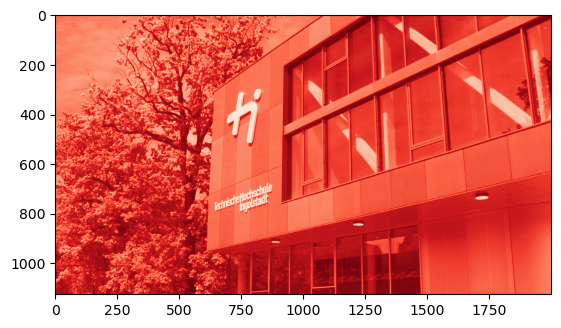

In [33]:
plt.imshow(red, cmap="Reds_r")

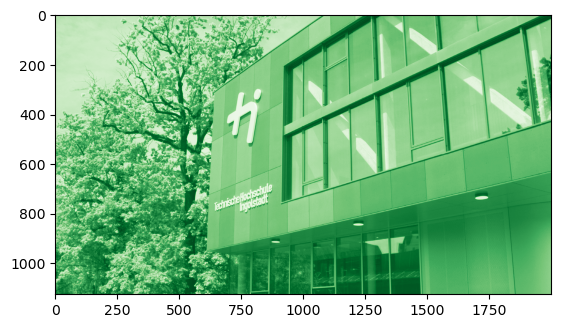

In [34]:
plt.imshow(green, cmap="Greens_r")

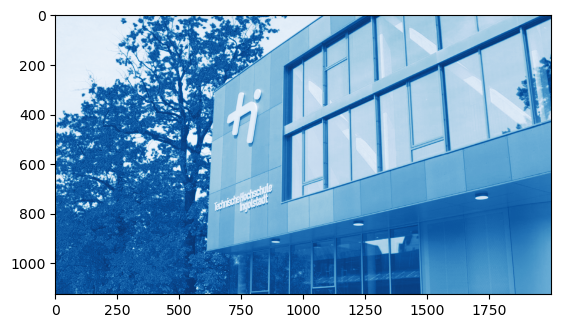

In [35]:
plt.imshow(blue, cmap="Blues_r")

## Get the pixel at coordinate 100, 100 and derive the r,g,b values from it

In [36]:
img[100, 100, :]

array([154, 192, 231], dtype=uint8)

## Use a graphic program (e.g. Gimp) and check what color this pixel encodes. Verify your result in the original image using the graphics program.

154, 192, 231, 255

## What are the corresponding values in the HSV scale?

H: 210, S: 33, V: 231

# OpenCV

OpenCV is a software package that we will be using during this practical course frequently.

## Make sure to install the <code>cv2</code> package

In [37]:
import cv2

## Read the same image as before, but this time using opencv

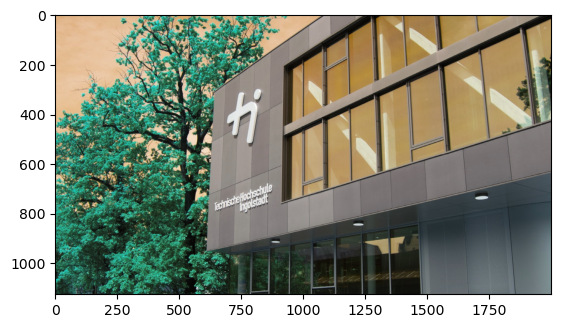

In [38]:
imgcv = cv2.imread('THI.jpg') 
plt.imshow(imgcv, cmap='gray')

## Again, check the data structure and shape

In [39]:
print(type(imgcv))
print(imgcv.shape)

<class 'numpy.ndarray'>
(1125, 2000, 3)


## Get the pixel at coordinate 100, 100 and derive the r,g,b values from it

In [40]:
imgcv[100, 100, :]

array([231, 192, 154], dtype=uint8)

## Why are they different?

The order is B-G-R in opencv and R-G-B in matplotlib.image

# Fourier


## Calculate and plot the fourier transform of the grayscale THI image

You can use the numpy rfft function to get the fast discrete fourier transformation.

In [ ]:
import numpy as np

In [41]:
from numpy.fft import fft2, ifft2, rfft2, irfft2

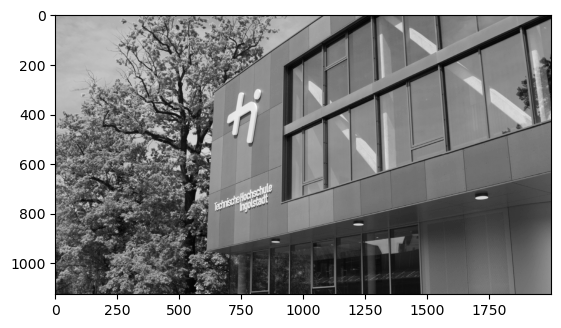

In [42]:
img_grayscale = cv2.imread("THI.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(img_grayscale, cmap="gray")
fft = rfft2(img_grayscale)

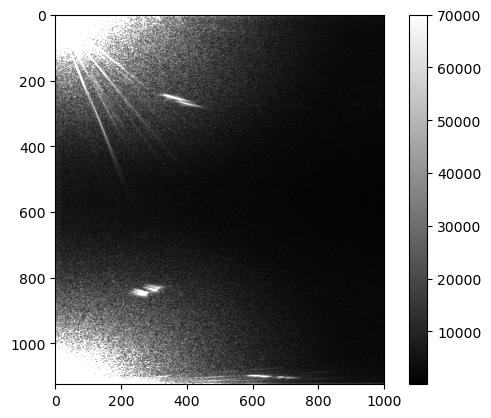

In [43]:
plt.imshow(np.abs(fft), cmap="gray", vmax=70000)
plt.colorbar()

## Plot the spectrum

In [44]:
# Get the magnitudes of the fft result 
magnitude = np.log(np.abs(fft))

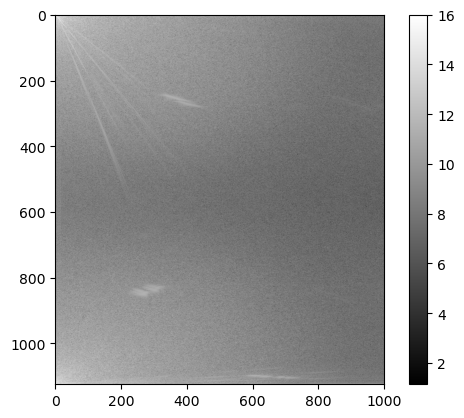

In [45]:
plt.imshow(magnitude, cmap="gray", vmax=16)
plt.colorbar()

## Implement a high and a low pass filter that can be applied to the fft result

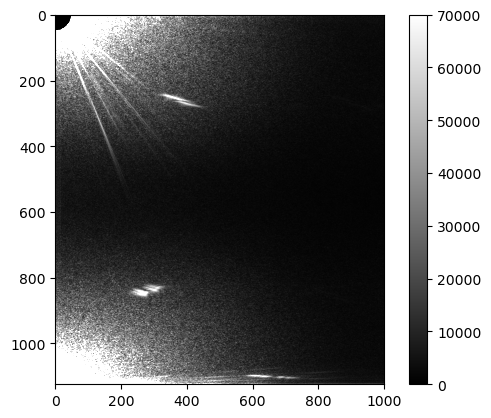

In [79]:
def high_pass_filter(arr, radius=100):

    high_pass_FT = np.copy(arr)
    for i, row in enumerate(high_pass_FT):
        for j, _ in enumerate(row):
            if i ** 2 + j ** 2 < radius ** 2:
                high_pass_FT[i, j] = 0
    return high_pass_FT

high_pass_fft = high_pass_filter(fft, radius=50)
plt.imshow(np.abs(high_pass_fft), cmap="gray", vmax=70000)
plt.colorbar()


In [82]:
def high_pass_filter(arr, radius=100):
    high_pass_FT = np.copy(arr)
    center_x, center_y = (0, 0)
    xx, yy = np.mgrid[:arr.shape[0], :arr.shape[1]]
    circle = xx ** 2 + yy ** 2
    high_pass_FT[circle < radius ** 2] = 0
    return high_pass_FT


In [47]:
def low_pass_filter(arr, radius=75):
    low_pass_FT = np.copy(arr)
    center_x, center_y = (0, 0)
    xx, yy = np.mgrid[:arr.shape[0], :arr.shape[1]]
    circle = (xx - center_x) ** 2 + (yy - center_y) ** 2
    low_pass_FT[circle > radius ** 2] = 0
    return low_pass_FT


## Plot the filtered spectrum for low and high pass filtering

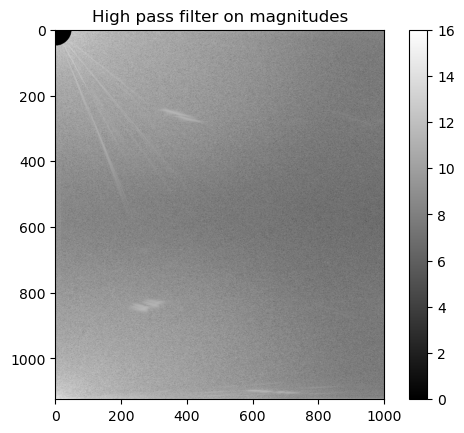

In [48]:
high_pass_fft = high_pass_filter(fft, radius=50)
high_pass_magnitude = high_pass_filter(magnitude, radius=50)
plt.imshow(high_pass_magnitude, cmap="gray", vmax=16)
plt.title("High pass filter on magnitudes")
plt.colorbar()

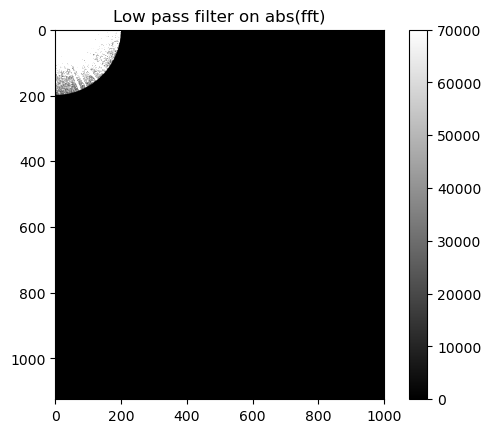

In [80]:
low_pass_fft = low_pass_filter(fft, radius=200)
low_pass_magnitude = low_pass_filter(magnitude, radius=200)
plt.imshow(np.abs(low_pass_fft), cmap="gray", vmax=70000)
plt.colorbar()
plt.title("Low pass filter on abs(fft)")
None

## Transform the filtered spectrum back to the original image space and plot the result

You can get the inverse transform by using <code>irfft</code>

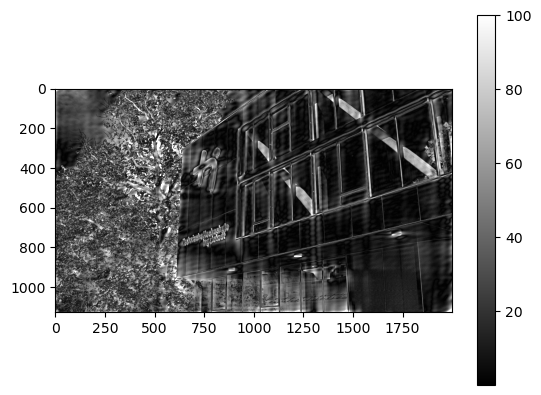

In [84]:
high_pass_filtered_img = irfft2(high_pass_fft)
#plt.imshow(high_pass_filtered_img, cmap="gray", vmax=0)
plt.imshow(np.abs(high_pass_filtered_img), cmap="gray", vmax=100)

plt.colorbar()

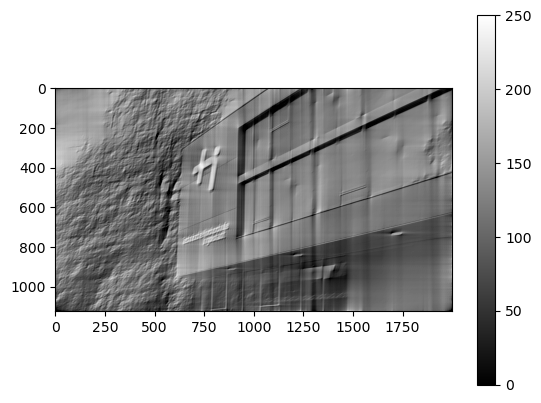

In [57]:
low_pass_filtered_img = irfft2(low_pass_fft)
fig = plt.Figure()
plt.imshow(low_pass_filtered_img, cmap="gray", vmin=0)
plt.colorbar()

# JPEG

## Take the image <code>THI.jpg</code> and convert it to jpeg with different qualities

You can set the jpeg quality within the imwrite command <code>cv2.imwrite('THI_50.jpg', image, [int(cv2.IMWRITE_JPEG_QUALITY), 10])</code>

In [1]:
imgcv = cv2.imread('THI.jpg') 
plt.imshow(imgcv, cmap='gray')

NameError: name 'cv2' is not defined

In [53]:
img = cv2.imwrite("THI_50.jpg", imgcv, [int(cv2.IMWRITE_JPEG_QUALITY), 50])


In [54]:
img = cv2.imwrite("THI_10.jpg", imgcv, [int(cv2.IMWRITE_JPEG_QUALITY), 10])


In [55]:
img = cv2.imwrite("THI_5.jpg", imgcv, [int(cv2.IMWRITE_JPEG_QUALITY), 5])


In [56]:
img = cv2.imwrite("THI_1.jpg", imgcv, [int(cv2.IMWRITE_JPEG_QUALITY), 1])


## What differences can you see at the different quality levels?

The lower the quality level, the larger areas are reduced into one color. 

## How is the file size changing when reducing the quality?

The smaller the quality level, the smaller the file gets (30 times smaller for level 1, 20 times smaller for level 5, 6 times smaller with level 50).